In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
col_names = ['Local Price', 'Bathrooms', 'Land Area', 'Living area','Garages','Rooms','Bedrooms','Age','Construction type']

In [5]:
# path of your data
data_path="Assignment4_Data.csv"
df = pd.read_csv(data_path, header=None, names=col_names)
df.head()

,Local Price,Bathrooms,Land Area,Living area,Garages,Rooms,Bedrooms,Age,Construction type
House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
1,4.9176,1,3.472,0.998,1,7,4,42,Apartment
2,5.0208,1,3.531,1.5,2,7,4,62,House
3,4.5429,1,2.275,1.175,1,6,3,40,Condo
4,4.5573,1,4.05,1.232,1,6,3,54,Apartment


In [6]:
df = df.iloc[1: , :]

In [7]:
X = df.drop('Construction type', axis=1)
y = df['Construction type']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

1. Use the default parameters.  
a. What is the accuracy on the training set?  
b. What is the accuracy on the test set? 

In [9]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   Apartment       0.50      0.50      0.50         2
       Condo       0.00      0.00      0.00         2
       House       0.00      0.00      0.00         0

    accuracy                           0.25         4
   macro avg       0.17      0.17      0.17         4
weighted avg       0.25      0.25      0.25         4



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

   Apartment       1.00      1.00      1.00         5
       Condo       1.00      1.00      1.00         4
       House       1.00      1.00      1.00         7

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



2.What is the effect of restricting the maximum depth of the tree? Try different depths and 
find the best value.


In [47]:
classifier = DecisionTreeClassifier(max_depth=32)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.25


In [48]:
scores={}
score_list=[]
krange=range(1,32) #Max Dept can be from 1 to 32
for k in krange: 
  classifier = DecisionTreeClassifier(max_depth=k)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  score_list.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

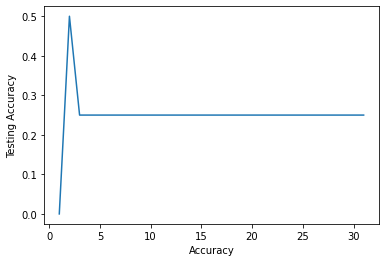

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(krange,score_list)
plt.xlabel("Accuracy")
plt.ylabel("Testing Accuracy")

3.Why does restricting the depth have such a strong effect on the classifier performance? 

Larger the depth of the tree more are the chances of variance(overfitting).
Whereas smaller the depth of the tree more are the chances of bias tree(underfitting).If height or depth of the tree is exactly one then such a tree is called as a decision stump. 